# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py 
#in the classifiers folder
from classifiers.perceptron import Perceptron
from classifiers.adaline import AdalineGD

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,1
1,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1
2,6.6,0.695,0.00,2.1,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,0
3,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
4,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1


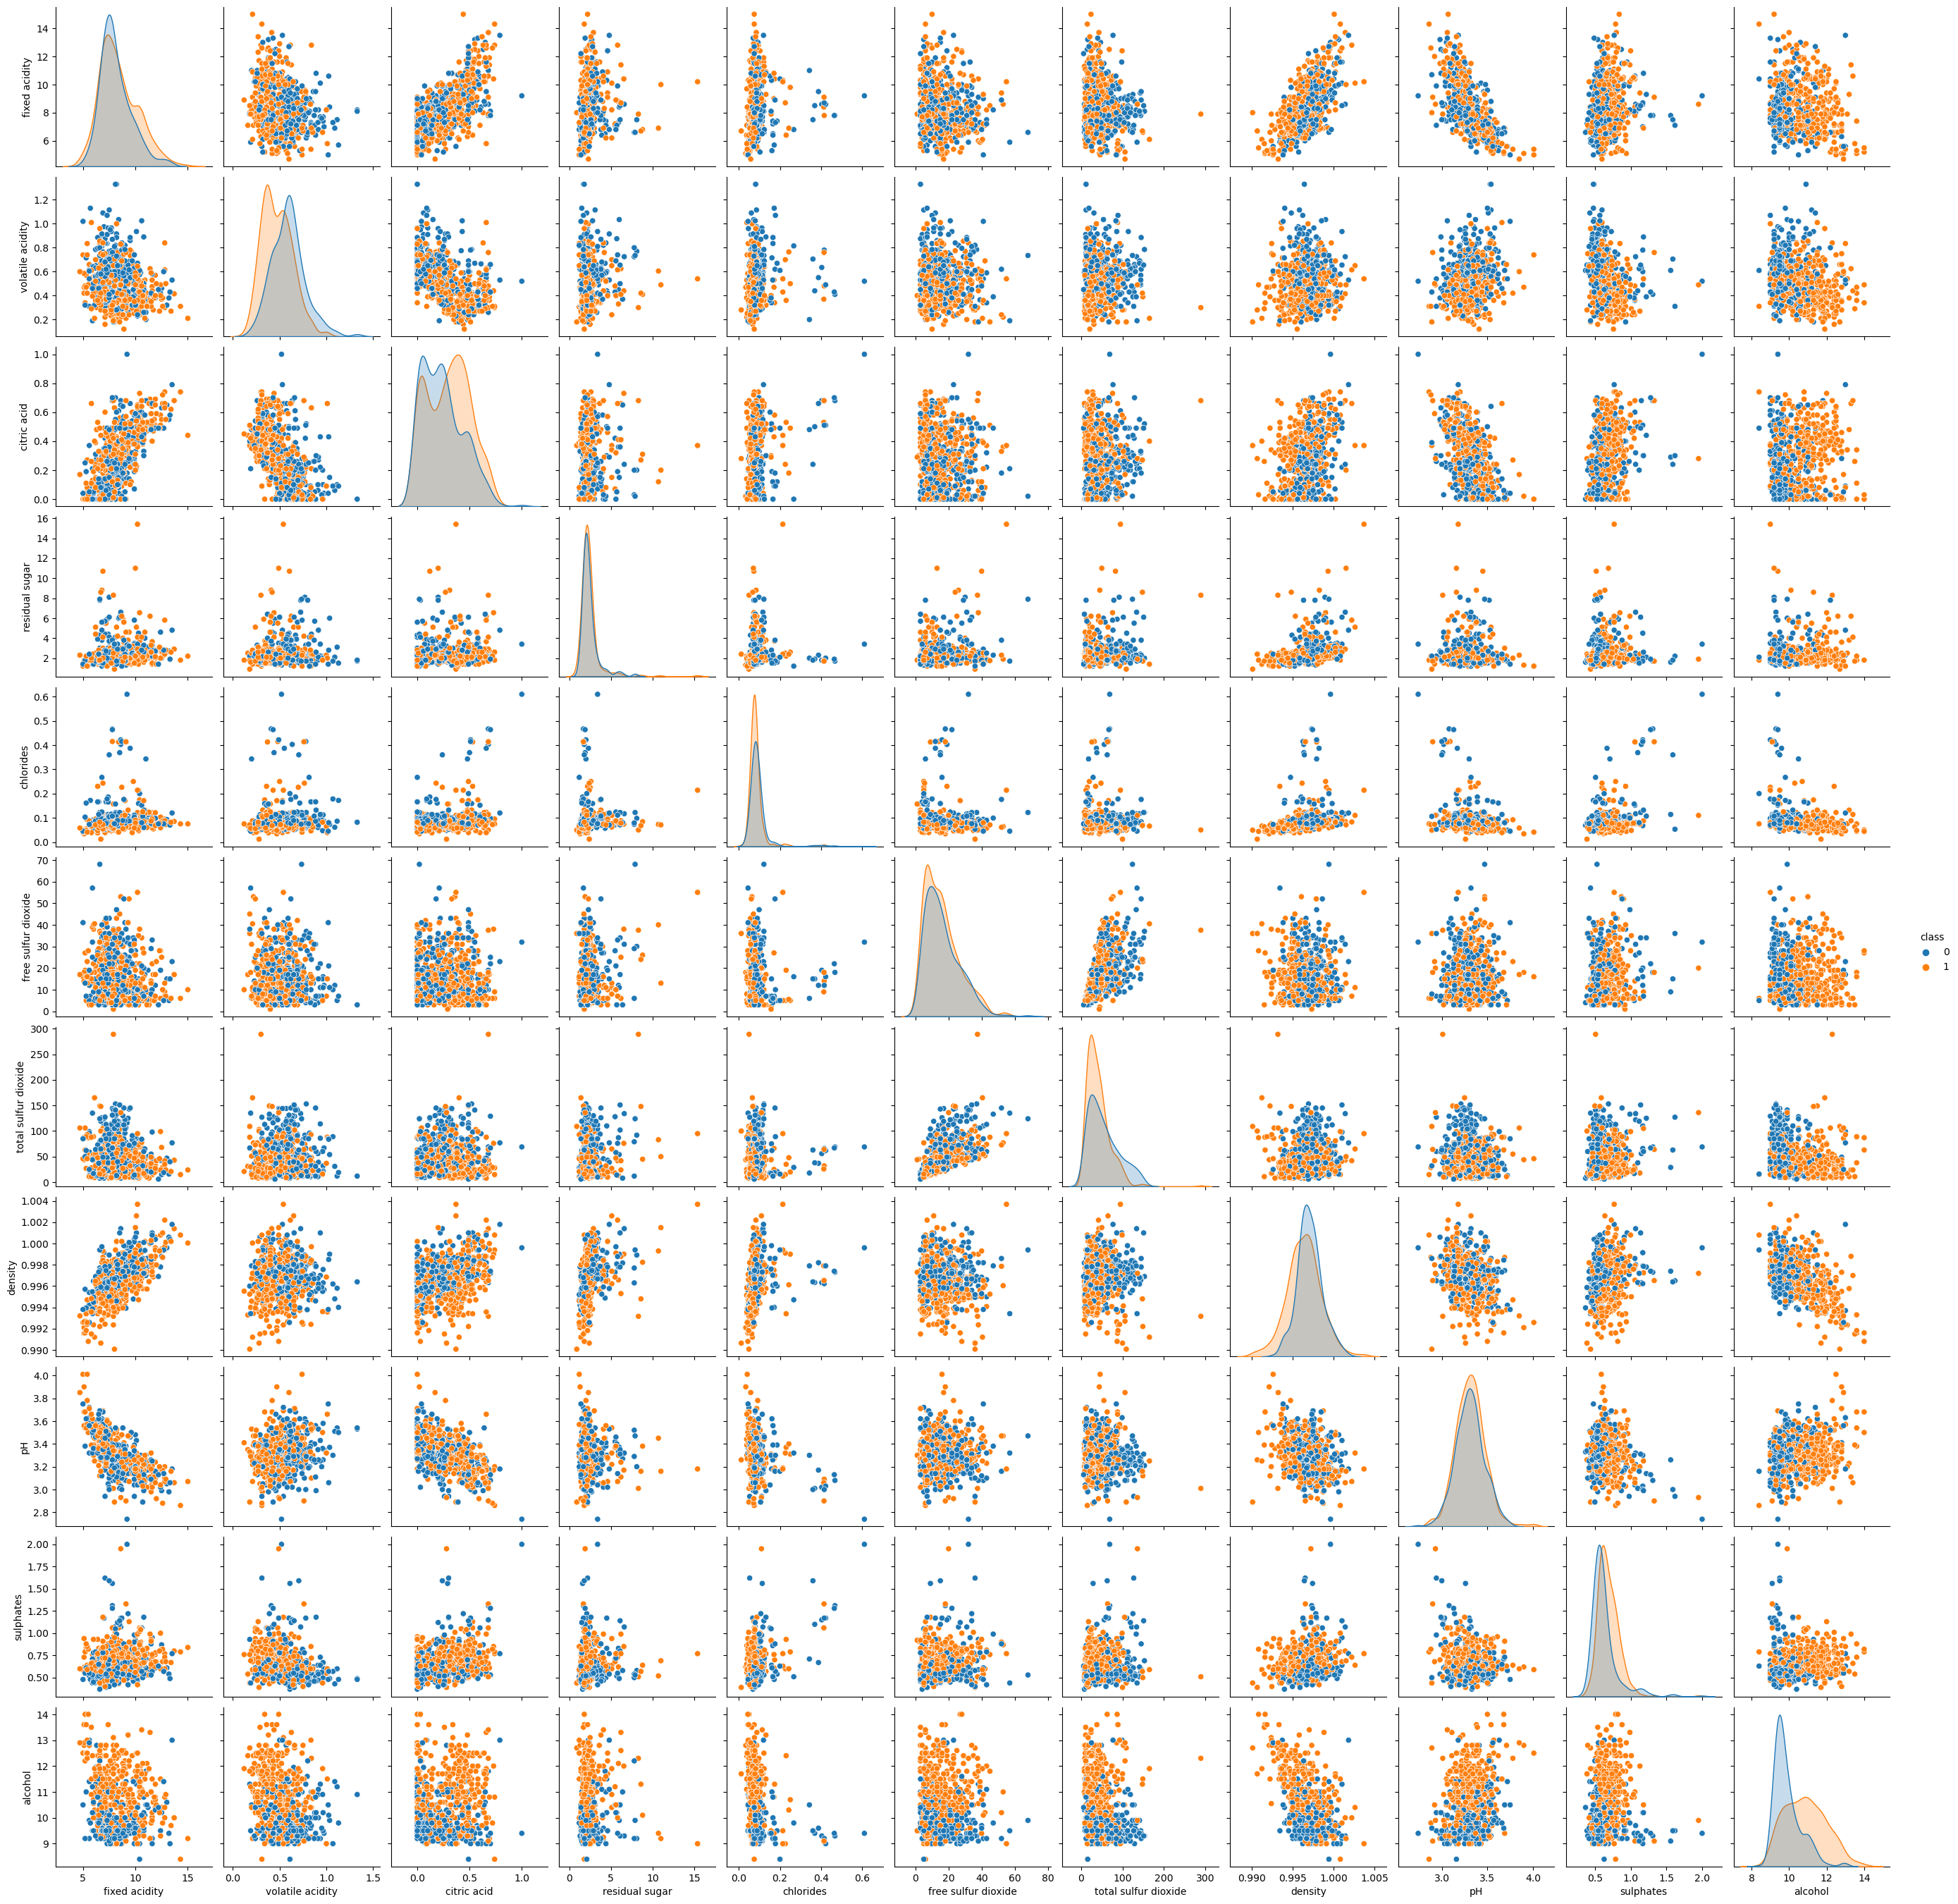

<Figure size 640x480 with 0 Axes>

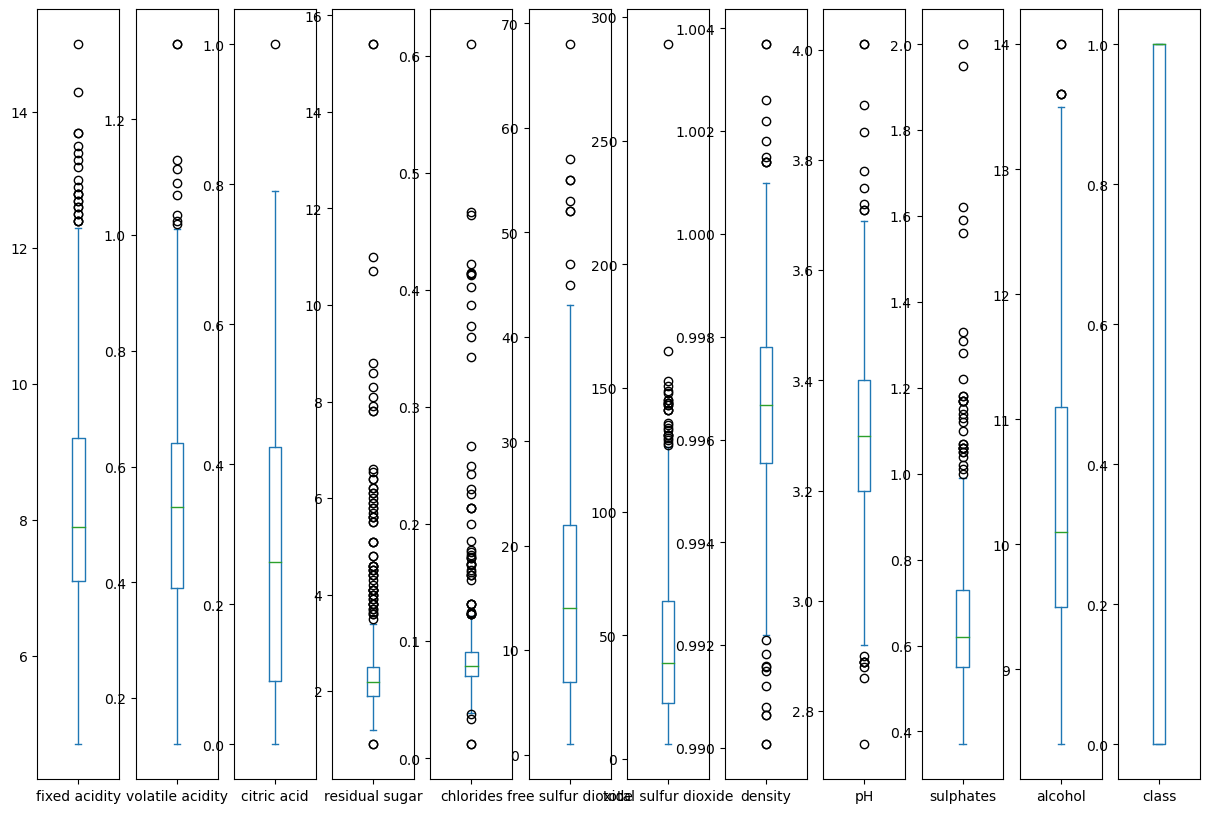

In [2]:
# Insert your code below
# ======================
#Loads the file
raw_df = pd.read_csv('assets\Wine.csv')
#Visualise the date in differetn ways
display(raw_df.head())
sns.pairplot(raw_df, hue='class')
plt.figure()
raw_df.plot(kind='box', 
                 subplots=True, figsize=(15,10) )
plt.show()

By looking at the boxplot we can se thar residual sugar, chlorides, sulfur dioxide and sulphates has a lot of outliers but in total we are working with a complete data set without any missing values. The data also looks like it has a lot of collinearity which most likely will make the performance worse.

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [3]:
# Insert your code below
# ======================
#converts the class from 0 to -1
raw_df['class'] = raw_df['class'].replace(to_replace=0,value=-1)
#splits the data into training and test
X_train = raw_df.iloc[0:400, :-1].values
y_train = raw_df.iloc[0:400, -1].values
X_test = raw_df.iloc[400:, :-1].values
y_test = raw_df.iloc[400:, -1].values

# Scales the data by using the mean and std for X_train
X_train_sc = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)
X_test_sc = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)    


# Checks if X_train is scaled correctly
X_train_sc_mean = np.mean(X_train_sc, axis=0)
X_train_sc_std = np.std(X_train_sc, axis=0, ddof=1)
display(X_train_sc_mean)
display(X_train_sc_std)

# Checks if X_test is scaled correctly
X_test_sc_mean = np.mean(X_test_sc, axis=0)
X_test_sc_std = np.std(X_test_sc, axis=0, ddof=1)
display(X_test_sc_mean)
display(X_test_sc_std)

array([-1.01696429e-15, -1.35447209e-16, -1.02140518e-16, -1.77635684e-17,
       -8.88178420e-17, -3.99680289e-17,  3.99680289e-17,  3.78364007e-14,
       -3.23741034e-15,  3.91908728e-16, -5.77315973e-16])

array([0.98738915, 0.98738915, 0.98738915, 0.98738915, 0.98738915,
       0.98738915, 0.98738915, 0.98738915, 0.98738915, 0.98738915,
       0.98738915])

array([ 0.02192344,  0.01409362,  0.02590559,  0.03235322, -0.06642695,
        0.15813887,  0.12769589, -0.02509528, -0.02838224, -0.03068814,
        0.00213149])

array([1.11401843, 1.02840952, 0.96325854, 1.1046716 , 0.83326182,
       1.05217409, 1.08412633, 1.00331689, 1.06246696, 1.00101385,
       0.98798911])

__Training:__

In [4]:
# Insert your code below
# ======================
#List to store performance for subset
TotalPerceptron = []
#List to store rownames
rowname_Perc = []
for subset in range(50, 401, 50): 
    #Creates rownames
    rowname_Perc += ["{0} out of 400".format(subset)]
    #List to store accuracy
    AccuracyPerc = []
    #List to store column name
    columnname_Perc = []
    for epoch in range(1,51):
        #activates the function
        perp = Perceptron(n_iter=epoch, eta=0.0001)
        #trains the model
        perp.fit(X_train_sc[:subset], y_train[:subset])
        #predicts the outcome
        y_pred_perp = perp.predict(X_test_sc)
        
        #create columnames
        columnname_Perc += ["{0} epoch".format(epoch)]
        
        #calculate accuracy and puts it in list
        correct = 0
        for j in range(len(y_pred_perp)):    
            if y_test[j] == y_pred_perp[j]:
                correct += 1
        acc = correct / len(y_pred_perp) * 100
        AccuracyPerc += [acc]
        
    TotalPerceptron += [AccuracyPerc]
    
#makes it a datframe and changes index and column names    
df_Perc = pd.DataFrame(TotalPerceptron)
df_Perc.columns = columnname_Perc 
df_Perc.index = rowname_Perc
df_Perc.head(8)

,1 epoch,2 epoch,3 epoch,4 epoch,5 epoch,6 epoch,7 epoch,8 epoch,9 epoch,10 epoch,...,41 epoch,42 epoch,43 epoch,44 epoch,45 epoch,46 epoch,47 epoch,48 epoch,49 epoch,50 epoch
50 out of 400,48.621554,51.629073,55.639098,57.393484,59.147870,60.902256,60.902256,60.651629,61.152882,60.902256,...,57.142857,56.892231,57.644110,57.393484,57.393484,58.646617,57.644110,58.395990,57.393484,57.644110
100 out of 400,51.879699,58.395990,61.152882,62.907268,63.659148,64.661654,65.162907,65.914787,66.165414,65.413534,...,70.676692,67.418546,68.922306,67.919799,68.671679,70.927318,73.934837,69.172932,68.922306,65.413534
150 out of 400,57.142857,61.654135,62.907268,64.912281,65.914787,65.413534,66.666667,66.416040,66.917293,67.167920,...,63.408521,61.403509,68.170426,65.914787,66.165414,67.418546,68.421053,63.157895,66.416040,63.909774
200 out of 400,58.395990,65.162907,66.165414,67.669173,67.167920,67.669173,67.418546,66.917293,68.170426,67.418546,...,67.919799,68.170426,67.418546,68.421053,72.431078,67.669173,71.679198,68.922306,70.426065,69.423559
250 out of 400,59.398496,65.914787,68.170426,65.914787,65.664160,66.416040,67.418546,68.421053,68.421053,65.162907,...,70.927318,68.421053,71.679198,64.912281,68.421053,70.676692,73.182957,69.674185,67.669173,66.165414
300 out of 400,58.897243,63.157895,65.664160,64.912281,60.150376,53.383459,46.115288,57.894737,60.401003,53.884712,...,62.656642,55.889724,58.395990,64.661654,50.877193,57.894737,55.137845,62.155388,63.909774,54.636591
350 out of 400,62.406015,64.411028,64.160401,62.656642,68.922306,65.162907,68.170426,66.917293,66.416040,60.651629,...,68.421053,58.395990,66.917293,65.413534,68.671679,64.912281,68.170426,65.914787,61.403509,70.175439
400 out of 400,62.656642,67.919799,66.666667,60.902256,59.899749,54.887218,56.641604,57.894737,62.406015,63.659148,...,63.408521,64.160401,57.142857,54.135338,64.912281,60.651629,53.884712,60.902256,55.889724,67.167920


In [5]:
#List to store performance for subset
TotalAdaline = []
#List for rownames
rowname_Ada = []
for subset in range(50, 401, 50):
    #Create rownames
    rowname_Ada += ["{0} out of 400".format(subset)]
    #List to store accuracy
    AccuracyAda = []
    #List for columnames
    columnname_Ada = []
    for epoch in range(1,51):
        #Activates the model
        ada = AdalineGD(n_iter=epoch, eta=0.0001)
        #Train the model
        ada.fit(X_train_sc[:subset], y_train[:subset])
        #Predict outcome
        y_pred_ada = ada.predict(X_test_sc)
        
        #Make columnames
        columnname_Ada += ["{0} epoch".format(epoch)]
        
        #Calculate the performance
        correct = 0
        for j in range(len(y_pred_ada)):    
            if y_test[j] == y_pred_ada[j]:
                correct += 1
        acc = correct / len(y_pred_ada) * 100
        AccuracyAda.append(acc)
        
    TotalAdaline.append(AccuracyAda)

#Makes a datafram and changes index and column names
df_Ada = pd.DataFrame(TotalAdaline)
df_Ada.columns = columnname_Ada
df_Ada.index = rowname_Ada
df_Ada.head(8)

,1 epoch,2 epoch,3 epoch,4 epoch,5 epoch,6 epoch,7 epoch,8 epoch,9 epoch,10 epoch,...,41 epoch,42 epoch,43 epoch,44 epoch,45 epoch,46 epoch,47 epoch,48 epoch,49 epoch,50 epoch
50 out of 400,47.368421,47.869674,49.373434,51.629073,54.135338,53.884712,57.393484,57.894737,59.147870,60.902256,...,66.416040,66.416040,66.666667,66.917293,66.917293,66.666667,66.666667,66.917293,66.666667,66.666667
100 out of 400,51.879699,53.634085,58.395990,62.155388,64.661654,66.666667,67.418546,68.170426,68.671679,69.172932,...,72.431078,72.681704,72.681704,72.681704,72.681704,73.182957,73.182957,73.182957,73.182957,73.433584
150 out of 400,52.631579,60.902256,65.664160,69.924812,70.426065,70.426065,70.426065,70.426065,70.426065,70.676692,...,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957
200 out of 400,56.390977,66.416040,68.671679,70.927318,71.679198,71.428571,70.927318,71.177945,71.177945,71.428571,...,73.433584,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957
250 out of 400,58.145363,69.172932,72.932331,72.681704,71.929825,71.428571,72.180451,72.180451,72.180451,72.431078,...,74.185464,74.185464,74.185464,74.185464,74.185464,74.185464,74.185464,74.185464,74.185464,74.185464
300 out of 400,60.401003,69.924812,73.182957,72.932331,73.182957,73.182957,73.182957,73.433584,73.433584,73.934837,...,73.684211,73.684211,73.684211,73.684211,73.433584,73.433584,73.433584,73.433584,73.433584,73.433584
350 out of 400,64.160401,69.674185,71.177945,71.679198,72.932331,73.182957,73.182957,72.932331,73.182957,73.433584,...,73.182957,73.182957,73.182957,73.182957,73.182957,73.182957,73.433584,73.433584,73.182957,73.182957
400 out of 400,64.912281,71.177945,72.681704,73.433584,73.433584,73.934837,73.934837,73.684211,73.433584,73.433584,...,72.932331,72.932331,72.932331,72.932331,73.182957,73.182957,73.182957,73.182957,72.681704,72.681704


## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn (Lenker til en ekstern side.). See below what the heatmaps should look like for the two classification algorithms.

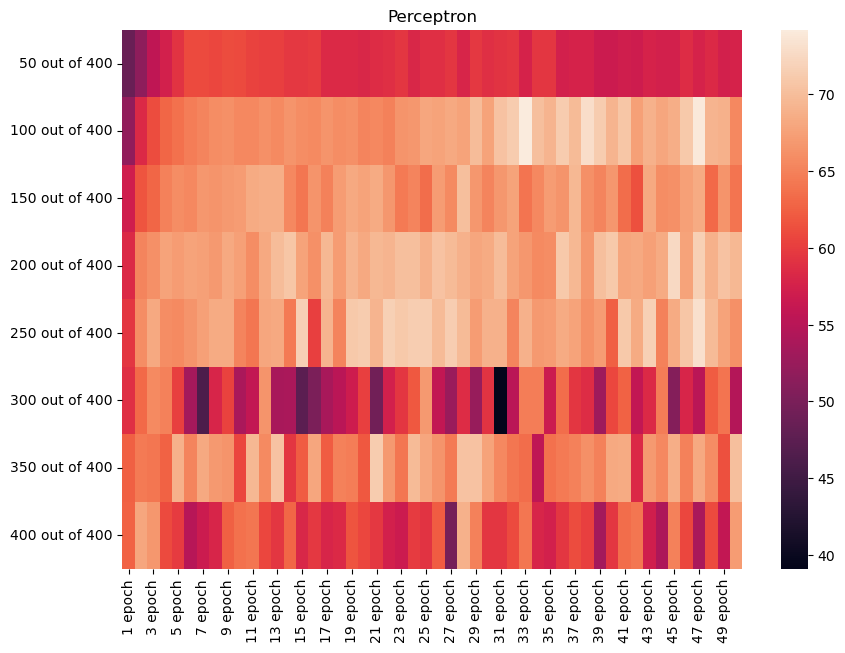

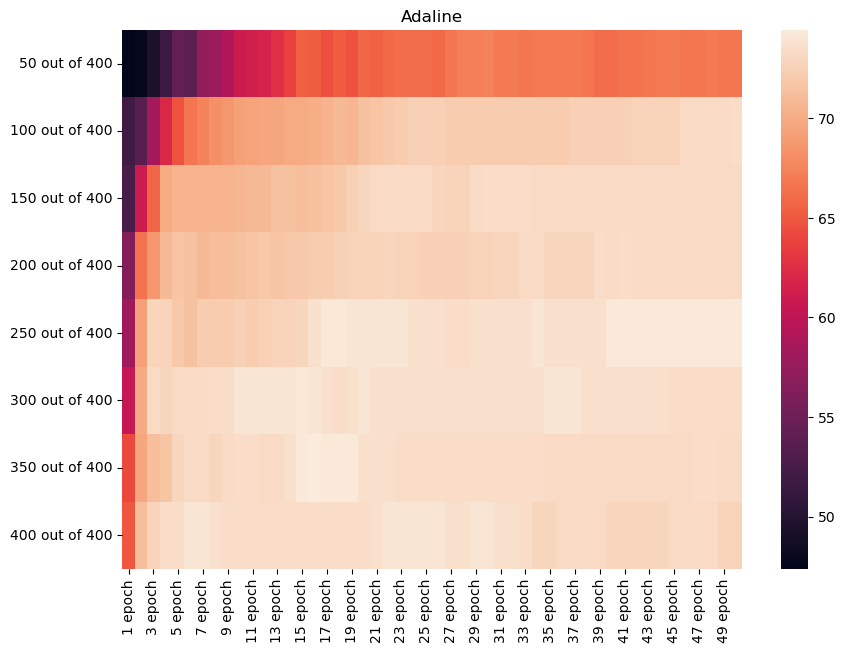

In [6]:
# Insert your code below
# ======================
#Create figure size and plot heatmap
figure = plt.gcf()
figure.set_size_inches(10,7)
sns.heatmap(df_Perc)
plt.title("Perceptron")
plt.figure()

#Create figure size and plot heatmap
figure = plt.gcf()
figure.set_size_inches(10,7)
sns.heatmap(df_Ada)
plt.title("Adaline")
plt.show()

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [7]:
# Insert your code below
# ======================
#Find the max value
max_val_Perc = df_Perc.max().max()
#Find position
row_index_Perc, col_index_Perc = np.where(df_Perc == max_val_Perc)
print("The maximum value for the Perceptron:\n",
      df_Perc.iloc[row_index_Perc, col_index_Perc],"\n")

#Find max value
max_val_Ada = df_Ada.max().max()
#Find postion
row_index_Ada, col_index_Ada = np.where(df_Ada == max_val_Ada)
print("The maximum value for the Adaline: \n",
      df_Ada.iloc[row_index_Ada, col_index_Ada])

The maximum value for the Perceptron:
                  33 epoch
100 out of 400  74.185464 

The maximum value for the Adaline: 
                 16 epoch
350 out of 400  74.43609


## Discussion

The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?

__Insert your answer below__

=====================

There is a multiple of reasons to why the perceptron is slower tha the adaline algorithm. The perceptron learning rule that only updates the weight when an error is made makes it slower beacuse of the data is highly colinear and hard to sepereate. The perceptron will then use multiple tries on one sample with the step function if it gets misclassified wich will increase the calculation time for each epoch.

The adaline algorithm will instead update the weight after each epoch with the gradient decent wich will lead to faster calculation time.